## Observations and Insights 

In [196]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_df = pd.merge(left= mouse_metadata, right = study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
mouse_study_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [197]:
# Checking the number of mice
total_mice = len(mouse_study_data_df["Mouse ID"].value_counts())
total_mice

249

In [198]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

has_duplicate = mouse_study_data_df.duplicated(["Mouse ID", "Timepoint"])

duplicate_mouseid = mouse_study_data_df.loc[has_duplicate]
duplicate_mice = duplicate_mouseid["Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [199]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mouseid_df = duplicate_mouseid
all_duplicate_mouseid_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [200]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = mouse_study_data_df.loc[mouse_study_data_df['Mouse ID'] != duplicate_mice[0], :]
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [201]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(clean_df["Mouse ID"].value_counts())
new_total_mice

248

## Summary Statistics

In [202]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

groupby_drug = clean_df.groupby(["Drug Regimen"])

mean_summary = groupby_drug["Tumor Volume (mm3)"].mean()
median_summary = groupby_drug["Tumor Volume (mm3)"].median()
var_summary = groupby_drug["Tumor Volume (mm3)"].var()
std_summary = groupby_drug["Tumor Volume (mm3)"].std()
sem_summary = groupby_drug["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({ "mean" : mean_summary,
                           "median" : median_summary,
                           "var" : var_summary,
                          "std": std_summary,
                          "sem" : sem_summary
                          })
summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [203]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

single_groupby = clean_df.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
single_groupby


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [204]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

group_mice_treatment = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

pandas_mice_treatment = group_mice_treatment.reset_index()
pandas_mice_treatment = pandas_mice_treatment.rename(columns = {"Mouse ID" : "Total number of Mice"})
pandas_mice_treatment = pandas_mice_treatment.set_index("Drug Regimen")
pandas_mice_treatment


,Total number of Mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


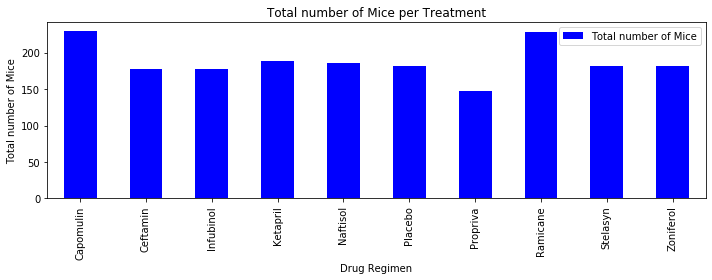

In [205]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
pandas_mice_treatment.plot(kind = "bar", color = "blue", figsize = (10, 4), legend = "Total number of Mice")

plt.title("Total number of Mice per Treatment")
plt.ylabel("Total number of Mice")
plt.tight_layout()

plt.show()

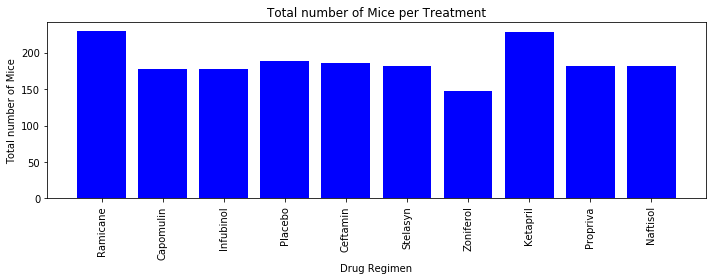

In [206]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

pandas_mice_treatment = pandas_mice_treatment.reset_index()

x_axis = np.arange(0, len(pandas_mice_treatment["Drug Regimen"]))

tick_name = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
             'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

plt.figure(figsize=(10,4))

plt.bar(x_axis, pandas_mice_treatment["Total number of Mice"], color = "blue", align = "center")
plt.xticks(x_axis, tick_name, rotation = "vertical")

plt.title("Total number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Mice")

plt.tight_layout()
plt.show()


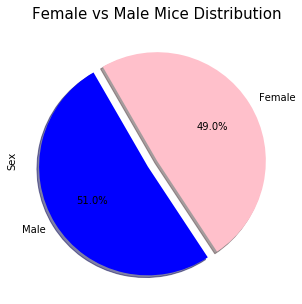

In [207]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
color = ["blue", "pink"]
explode = [0.10, 0]
mice_gender = clean_df["Sex"].value_counts()
mice_gender.plot(kind = "pie", autopct="%1.1f%%", colors = color, explode = explode, shadow = True, startangle = 120, figsize = (5, 5))
plt.title("Female vs Male Mice Distribution", fontsize = 15)
plt.show()

/Users/preeti/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


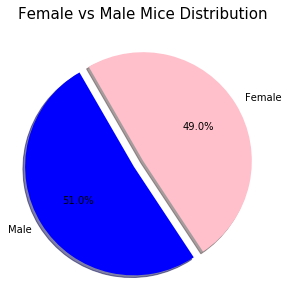

In [208]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
color = ["blue", "pink"]
explode = [0.10, 0]
labels = ["Male", "Female"]
sizes = [clean_df["Sex"].value_counts()]

plt.figure(figsize=(5,5))
plt.pie(sizes, colors = color, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, startangle = 120)
plt.title("Female vs Male Mice Distribution", fontsize = 15)
plt.show()

## Quartiles, Outliers and Boxplots

In [209]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin_max_timepoint = capomulin_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

merged_capomulin = pd.merge(left = mouse_study_data_df, right = capomulin_max_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")
merged_capomulin.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3


In [210]:
# Ramicane

ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
ramicane_max_timepoint = ramicane_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

merged_ramicane = pd.merge(left = mouse_study_data_df, right = ramicane_max_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")
merged_ramicane.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,g791,Ramicane,Male,11,16,45,29.128472,1
2,s508,Ramicane,Male,1,17,45,30.276232,0
3,m546,Ramicane,Male,18,16,45,30.564625,1
4,z578,Ramicane,Male,11,16,45,30.638696,0


In [211]:
# Infubinol

infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
infubinol_max_timepoint = infubinol_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

merged_infubinol = pd.merge(left = mouse_study_data_df, right = infubinol_max_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")
merged_infubinol.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a577,Infubinol,Female,6,25,30,57.031862,2
3,a685,Infubinol,Male,8,30,45,66.083066,3
4,c139,Infubinol,Male,11,28,45,72.226731,2


In [212]:
# Ceftamin

ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
ceftamin_max_timepoint = ceftamin_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

merged_ceftamin = pd.merge(left = mouse_study_data_df, right = ceftamin_max_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")
merged_ceftamin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a275,Ceftamin,Female,20,28,45,62.999356,3
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,b487,Ceftamin,Female,6,28,25,56.057749,1
3,b759,Ceftamin,Female,12,25,30,55.742829,1
4,f436,Ceftamin,Female,3,25,15,48.722078,2


In [213]:
# tumor_volume = clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
# tumor_volume

# final_tumor_vol = pd.merge(left = mouse_study_data_df, right = tumor_volume, on = ["Mouse ID", "Timepoint"], how = "right")

# final_tumor_vol


In [214]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# # Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_treatment = final_tumor_vol.loc[(final_tumor_vol["Drug Regimen"] == treatment), final_tumor_vol["Tumor Volume (mm3)"]]
    
    # add subset 
    tumor_vol_list.append(tumor_vol_treatment)
    
#     # Determine outliers using upper and lower bounds
# tumor_vol_list



KeyError: "None of [Float64Index([22.05012627, 23.34359787, 28.48403281, 28.43096411, 29.12847181,\n              30.27623175, 30.48598484, 30.56462509, 30.63869575, 31.56046955,\n              ...\n              66.84263453, 48.47500273, 68.59474498, 64.72983655, 46.12935706,\n              45.93471217, 48.71066147, 62.75445141, 65.74107029, 73.86784476],\n             dtype='float64', length=248)] are in the [columns]"

In [215]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [216]:
merged_capomulin.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0


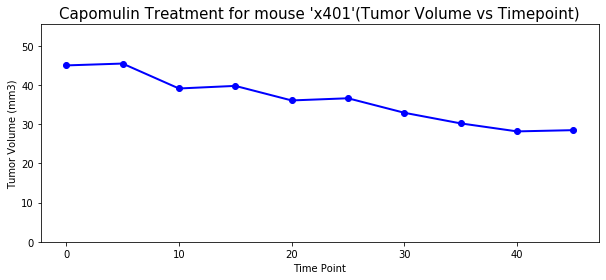

In [217]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "x401", :]

plot_capomulin_mouse = capomulin_mouse[["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint")

capomulin_mouse_df = plot_capomulin_mouse.reset_index()

plot_capomulin_mouse.plot(kind = "line", marker = "o", color = "blue", linewidth=2, legend = None, figsize = (10, 4))
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for mouse 'x401'(Tumor Volume vs Timepoint)", fontsize = 15)
plt.ylim(0, max(capomulin_mouse_df["Tumor Volume (mm3)"]) + 10)

plt.show()


In [218]:
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


[]

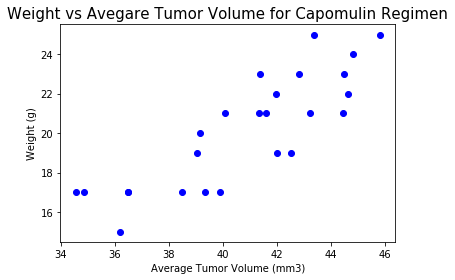

In [241]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


avg_tumor_vol = capomulin_df.groupby(capomulin_df["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
avg_tumor_vol = avg_tumor_vol.reset_index()

x_axis = avg_tumor_vol["Tumor Volume (mm3)"]
y_axis = avg_tumor_vol["Weight (g)"]

# marker_size = 10
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Weight vs Avegare Tumor Volume for Capomulin Regimen", fontsize = 15)
# plt.ylim(0, max(y_axis) + 10)
# # plt.xlim(0, max(x_axis) + 10)

plt.plot()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


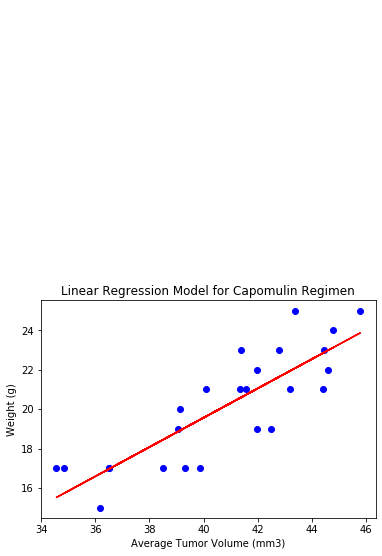

In [242]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_tumor_vol
x_value = avg_tumor_vol["Tumor Volume (mm3)"]
y_value = avg_tumor_vol["Weight (g)"]



correlation = st.pearsonr(x_value, y_value)

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value, color = "blue")
plt.plot(x_value,regress_values,"r-")

plt.annotate(line_eq,(36, 40),fontsize = 10, color="red")
plt.title("Linear Regression Model for Capomulin Regimen")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

In [ ]:
 mouse_study_data_df.loc[mouse_study_data_df["Mouse ID"] == "g989"]